In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from shapely.ops import linemerge, Polygon
from shapely.wkt import loads
import matplotlib.pyplot as plt
import plotly.express as px

C:\Users\artir\Miniconda3\envs\geo_env\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [26]:
pd.set_option('display.max_rows', None)

In [27]:
#read in roads shp file
roads_gdf = gpd.read_file('')
roads_gdf.head()

,name,Section_ID,U/R,parish,length,geometry
0,Achterdam,Adam/001/Lash-Wtrl,urban,Nickerie,1192.469808,"LINESTRING (-56.99713 5.93893, -56.99634 5.938..."
1,Anamoestraat,Anmo/001/Plto-JoIs,urban,Paramaribo,1349.186168,"LINESTRING (-55.14789 5.84572, -55.14761 5.846..."
2,Anamoestraat,Anmo/002/JoIs-Klne,urban,Paramaribo,1517.271849,"LINESTRING (-55.14183 5.85617, -55.14178 5.856..."
3,Anton Dragtenweg,AnDr/001/Mhny-MrCu,urban,Paramaribo,1906.095615,"LINESTRING (-55.13949 5.83163, -55.13934 5.831..."
4,Anton Dragtenweg,AnDr/002/MrCu-Boni,urban,Paramaribo,1543.048599,"LINESTRING (-55.12335 5.83721, -55.12329 5.837..."


In [28]:
roads_gdf.shape[0]

228

In [29]:
#read in defects shp file
defects_gdf = gpd.read_file('')
defects_gdf.head()

,latitude,longitude,distances,ind,frame,section,classes,ind2,scores,class_id,...,height,width,total_area,perc_area,fail_id_se,Video Name,defect_rea,defect_r_1,defect_are,geometry
0,5.819276,-57.052785,0.016472,30,40.0,0,Desenfoque Linea Blanca,30,0.746718,Desenfoque Linea Blanca,...,535.338974,945.616129,4110080,0.123167,0,Suriname\Results\GX011381 (2),3.349057,1.204346,4.033422,POINT (-57.05278 5.81928)
1,5.819275,-57.052785,0.016472,32,49.0,0,Desenfoque Linea Blanca,33,0.790074,Desenfoque Linea Blanca,...,223.665161,646.487019,4110080,0.035181,1,Suriname\Results\GX011381 (2),2.289642,0.503177,1.152094,POINT (-57.05279 5.81928)
2,5.819274,-57.052786,0.016472,35,57.0,0,Desenfoque Linea Blanca,36,0.713043,Desenfoque Linea Blanca,...,221.810961,667.914698,4110080,0.036046,1,Suriname\Results\GX011381 (2),2.365531,0.499005,1.180413,POINT (-57.05279 5.81927)
3,5.817883,-57.053412,1.063324,41,92.0,2,Desenfoque Linea Blanca,42,0.903465,Desenfoque Linea Blanca,...,237.500181,869.388390,4110080,0.050237,4,Suriname\Results\GX011381 (2),3.079084,0.534301,1.645158,POINT (-57.05341 5.81788)
4,5.816069,-57.054230,1.104771,45,112.0,4,Desenfoque Linea Blanca,46,0.704433,Desenfoque Linea Blanca,...,229.086609,600.341516,4110080,0.033462,7,Suriname\Results\GX011381 (2),2.126210,0.515373,1.095792,POINT (-57.05423 5.81607)


In [30]:
defects_gdf['geometry'] = defects_gdf['geometry'].to_crs(crs=3857)
roads_gdf['geometry'] = roads_gdf['geometry'].to_crs(crs=3857)

In [31]:
print(roads_gdf.crs)
print(defects_gdf.crs)

epsg:3857
epsg:3857


C:\Users\artir\Miniconda3\envs\geo_env\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

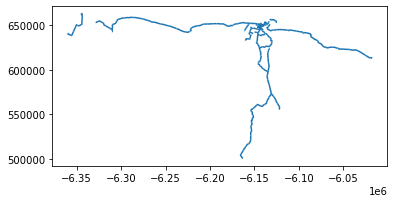

In [32]:
roads_gdf.plot()

In [33]:
#buffer the center line of the road (roughly 7m)
roads_gdf['geometry'] = roads_gdf['geometry'].buffer(7.5, cap_style=2)
roads_gdf.head()

,name,Section_ID,U/R,parish,length,geometry
0,Achterdam,Adam/001/Lash-Wtrl,urban,Nickerie,1192.469808,"POLYGON ((-6344803.009 662309.217, -6344770.20..."
1,Anamoestraat,Anmo/001/Plto-JoIs,urban,Paramaribo,1349.186168,"POLYGON ((-6139010.955 651933.899, -6139010.89..."
2,Anamoestraat,Anmo/002/JoIs-Klne,urban,Paramaribo,1517.271849,"POLYGON ((-6138360.892 653058.527, -6138344.52..."
3,Anton Dragtenweg,AnDr/001/Mhny-MrCu,urban,Paramaribo,1906.095615,"POLYGON ((-6138085.409 650309.823, -6138044.59..."
4,Anton Dragtenweg,AnDr/002/MrCu-Boni,urban,Paramaribo,1543.048599,"POLYGON ((-6136298.928 650931.723, -6136245.08..."


In [34]:
#roads_gdf['geometry'] = roads_gdf['geometry'].to_crs(crs=4326)

In [35]:
# #buffer the defect (roughly 2.5m)
#defects_gdf['geometry'] = defects_gdf['geometry'].buffer(3)
#defects_gdf.head()

In [36]:
defects_gdf['geometry'] = defects_gdf['geometry'].to_crs(crs=4326)
roads_gdf['geometry'] = roads_gdf['geometry'].to_crs(crs=4326)
#defects_gdf['geometry'] = defects_gdf['geometry'].to_crs(crs=3857)
#roads_gdf['geometry'] = roads_gdf['geometry'].to_crs(crs=3857)
print(roads_gdf.crs)
print(defects_gdf.crs)

epsg:4326
epsg:4326


In [37]:
defects_locations = gpd.sjoin(defects_gdf, roads_gdf, how='left', predicate='intersects')
#defects_locations = defects_gdf.sjoin_nearest(roads_gdf, how='left', max_distance = 7)

In [39]:
#print(defects_locations['Section_ID'].value_counts())
print(defects_locations['Section_ID'].isna().sum())

128


In [40]:
defects_locations.shape

(839, 28)

In [41]:
#read exisitng Section
df_main = pd.read_csv("")
#df_main.head()

In [42]:
df_main = df_main.drop('Unnamed: 0', axis=1)
#df_main.head()

In [43]:
df_main.shape[0]

1523

In [44]:
merged = pd.concat([defects_locations, df_main], ignore_index=True)

In [46]:
merged.shape[0]

2362

In [47]:
merged.to_csv("")